In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [5]:
df = pd.read_csv('economic_index.csv')

df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [12]:
# Drop unneccessary colums
df.drop(columns=['Unnamed: 0','year','month'], axis=1, inplace=True)
# Check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [13]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


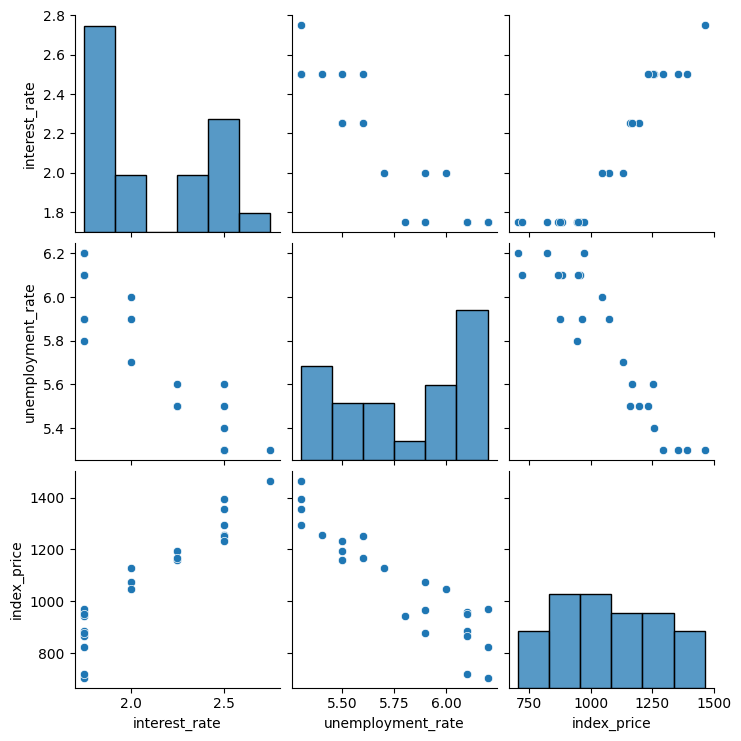

In [14]:
# Visualiation
import seaborn as sns
sns.pairplot(df)

In [15]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

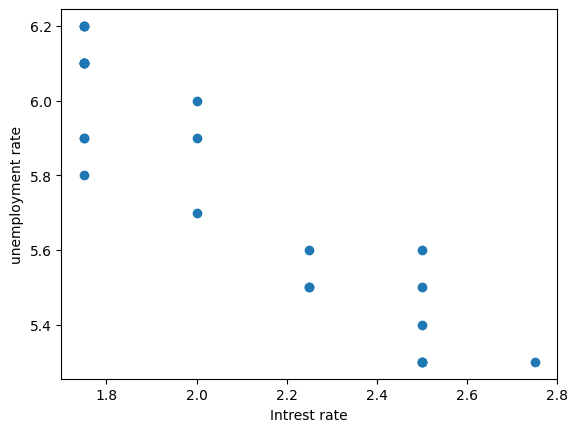

In [18]:
# Visualise data point
plt.scatter(df['interest_rate'], df['unemployment_rate'])
plt.xlabel("Intrest rate")
plt.ylabel("unemployment rate")

In [26]:
## Independent and dependent features

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
X.head(), y.head()

(   interest_rate  unemployment_rate
 0           2.75                5.3
 1           2.50                5.3
 2           2.50                5.3
 3           2.50                5.3
 4           2.50                5.4,
 0    1464
 1    1394
 2    1357
 3    1293
 4    1256
 Name: index_price, dtype: int64)

In [31]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

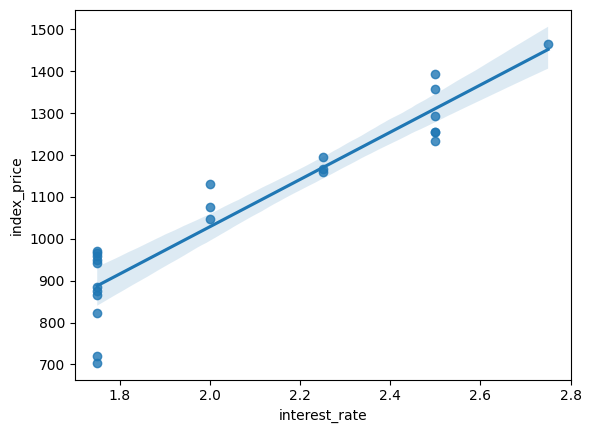

In [35]:
import seaborn as sns
sns.regplot(x='interest_rate', y='index_price',data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

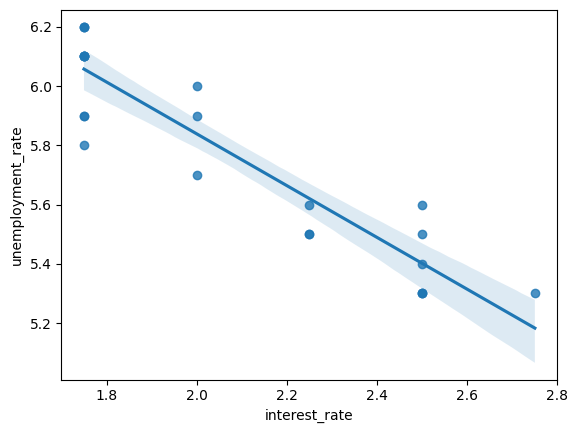

In [37]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

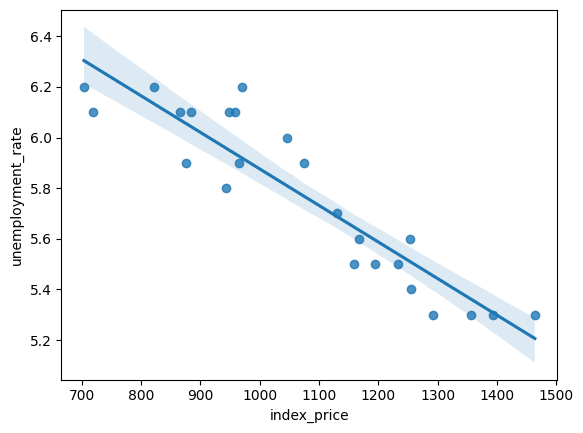

In [38]:
sns.regplot(x='index_price', y='unemployment_rate', data=df)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# Cross Validation is technique to used when we have small set of data and need to train the model. It seprate data in diffrent way and add as input to Model.
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression,X_train,y_train,cv=3)

print(validation_score)

[0.88856676 0.82159918 0.85226213]


In [47]:
np.mean(validation_score)

np.float64(0.8541426890278226)

In [48]:
## Prediction
y_pred = regression.predict(X_test)

In [49]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [51]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [53]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
# display adjuested R-squared

print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


### Assumptions


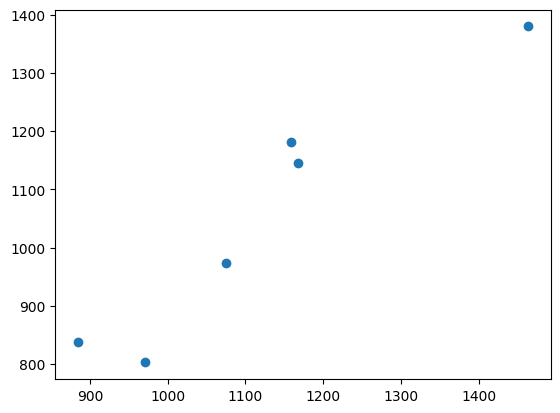

In [54]:
plt.scatter(y_test, y_pred)

In [55]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


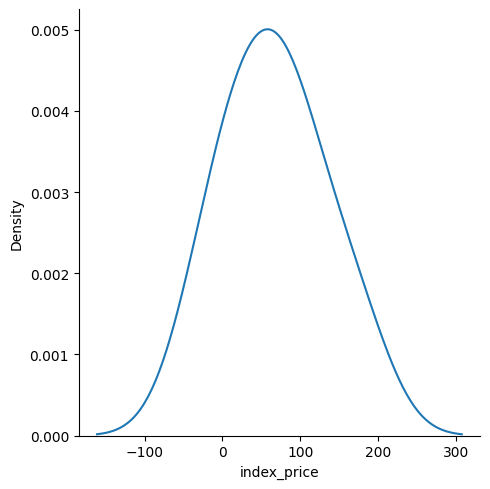

In [57]:
# Plot the residuals
sns.displot(residuals, kind='kde')

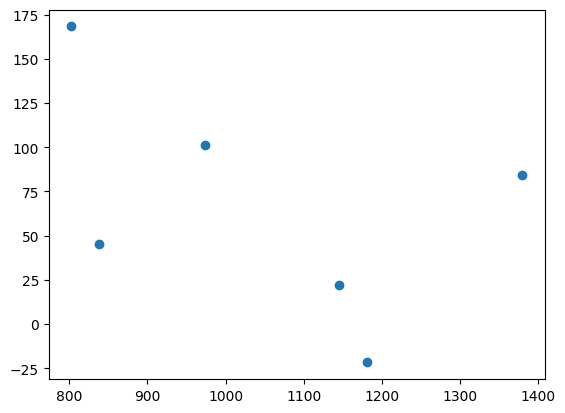

In [58]:
# Scatter plot with respect to prediction and residuals

plt.scatter(y_pred, residuals)

In [59]:
# OLS Linear Regression

import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [60]:
model.summary()

d:\EndEndProject\Github Project\MachineLearningProjects\myenv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 18 Jan 2025   Prob (F-statistic):                       0.754
Time:                        00:26:00   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [ ]:
## Steps Performed

1. Droping unneccesary columns, Check the null value
2. Check correlation
3. Sperating independent and dependent variable. (X,y)
4. Train and Split data
5. Standarization of data using standard scaler
6. regression.fit(X_train, y_train)
7. Cross validation
8. regression.predict
9. model metrics (mae, mse)